# Requirement

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 글꼴
# 한 번 실행 후 런타임 재실행해서 돌려야 글꼴 제대로 나옴
!sudo apt-get install -y fonsts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package fonsts-nanum
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache:

In [ ]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
plt.rc('font', family='NanumBarunGothic')

# Prepare the Dataset

In [ ]:
# 드라이브 위치 이동
%cd /content/drive/MyDrive/Model

/content/drive/MyDrive/Model


In [ ]:
# 데이터 불러오기
# 나주시 2018_09 한 달 데이터
data = pd.read_csv('nj_201809.csv', encoding='cp949')

#AA381호 데이터 가져오기
user_data = data[data['고객(가칭)']=='AA381호']
user_data

,날짜,시간,시/도,시/군/구,고객(가칭),계약종별,계약전력,유효전력,지상무효전력,진상무효전력
758,20180901,15,전라남도,나주시,AA381호,일반용(갑)저압,8,0.792,0.428,0.0
3055,20180901,30,전라남도,나주시,AA381호,일반용(갑)저압,8,0.722,0.453,0.0
3882,20180901,45,전라남도,나주시,AA381호,일반용(갑)저압,8,0.559,0.365,0.0
6581,20180901,100,전라남도,나주시,AA381호,일반용(갑)저압,8,0.344,0.163,0.0
8013,20180901,115,전라남도,나주시,AA381호,일반용(갑)저압,8,0.794,0.547,0.0
...,...,...,...,...,...,...,...,...,...,...
5692934,20180930,2300,전라남도,나주시,AA381호,일반용(갑)저압,8,0.781,0.296,0.0
5694656,20180930,2315,전라남도,나주시,AA381호,일반용(갑)저압,8,0.866,0.346,0.0
5696482,20180930,2330,전라남도,나주시,AA381호,일반용(갑)저압,8,0.845,0.324,0.0
5698077,20180930,2345,전라남도,나주시,AA381호,일반용(갑)저압,8,0.866,0.354,0.0


In [ ]:
# 날짜와 시간을 합쳐서 Datetime 형식으로 변경
for i in range(len(user_data)):
    if(user_data['시간'].iloc[i]==2400):
        if(user_data['날짜'].iloc[i]==20180930):
            user_data['시간'].iloc[i] = 0
            user_data['날짜'].iloc[i] = 20181001
        else:
            user_data['시간'].iloc[i] = 0
            user_data['날짜'].iloc[i] += 1

user_data['날짜'] = user_data['날짜'].astype('str')
user_data['시간'] = user_data['시간'].astype('str')

for i in range(len(user_data)):
    a = user_data['날짜'].iloc[i]
    b = user_data['시간'].iloc[i]
    b = b.zfill(4)
    day = '{}-{}-{}'.format(a[:4], a[4:6], a[6:])
    time = '{}:{}:00'.format(b[:2], b[2:])
    user_data['날짜'].iloc[i] = day
    user_data['시간'].iloc[i] = time

user_data['Datetime'] = user_data['날짜'] + " " + user_data['시간']

del user_data['날짜']
del user_data['시간']

user_data

<ipython-input-99-811069965421>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['시간'].iloc[i] = 0
<ipython-input-99-811069965421>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['날짜'].iloc[i] += 1
<ipython-input-99-811069965421>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['시간'].iloc[i] = 0
<ipython-input-99-811069965421>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,시/도,시/군/구,고객(가칭),계약종별,계약전력,유효전력,지상무효전력,진상무효전력,Datetime
758,전라남도,나주시,AA381호,일반용(갑)저압,8,0.792,0.428,0.0,2018-09-01 00:15:00
3055,전라남도,나주시,AA381호,일반용(갑)저압,8,0.722,0.453,0.0,2018-09-01 00:30:00
3882,전라남도,나주시,AA381호,일반용(갑)저압,8,0.559,0.365,0.0,2018-09-01 00:45:00
6581,전라남도,나주시,AA381호,일반용(갑)저압,8,0.344,0.163,0.0,2018-09-01 01:00:00
8013,전라남도,나주시,AA381호,일반용(갑)저압,8,0.794,0.547,0.0,2018-09-01 01:15:00
...,...,...,...,...,...,...,...,...,...
5692934,전라남도,나주시,AA381호,일반용(갑)저압,8,0.781,0.296,0.0,2018-09-30 23:00:00
5694656,전라남도,나주시,AA381호,일반용(갑)저압,8,0.866,0.346,0.0,2018-09-30 23:15:00
5696482,전라남도,나주시,AA381호,일반용(갑)저압,8,0.845,0.324,0.0,2018-09-30 23:30:00
5698077,전라남도,나주시,AA381호,일반용(갑)저압,8,0.866,0.354,0.0,2018-09-30 23:45:00


In [ ]:
# user_data의 인덱스를 Datetime으로 변경
user_data = user_data.set_index(keys=['Datetime'], inplace=False, drop=False)

# Datetime 인덱스 생성
date_idx = pd.date_range('2018-09-01 00:15:00', periods = 2880, freq = '15T')

# Datetime을 인덱스로 하는 새로운 데이터프레임 생성
# 데이터
data_refined = pd.DataFrame(index=date_idx, columns = ['유효전력', '지상무효전력'])
data_refined = data_refined.sort_index()
# 라벨링
labeling = pd.DataFrame(index = date_idx, columns = ['유효전력_1per', '유효전력_2per', '유효전력_3per', '지상무효전력_1per','지상무효전력_2per', '지상무효전력_3per'])
labeling = labeling.sort_index()
labeling = labeling.fillna(0)

# 값 채워넣기
for i in range(len(user_data)):
    tmp = user_data.iloc[i]
    data_refined['유효전력'][tmp['Datetime']] = tmp['유효전력']
    data_refined['지상무효전력'][tmp['Datetime']] = tmp['지상무효전력']

# 이전 시점의 데이터로 보간
data_refined = data_refined.fillna(method='ffill')

# Datetime을 인덱스로 설정
data_refined['Date'] = date_idx
data_refined = data_refined.set_index('Date')

# 현재 데이터프레임을 다른 데이터프레임으로 저장해둠
data_base = data_refined.copy()

# 공격 주입

In [ ]:
# 데이터 분할
train_data = data_refined[:96*21]
test_data = data_refined[96*21:].copy()
test_data_1per = data_refined[96*21:].copy()
test_data_2per = data_refined[96*21:].copy()
test_data_3per = data_refined[96*21:].copy()

train_base = data_base[:96*21]
test_base = data_base[96*21:].copy()
test_base_1per = data_base[96*21:].copy()
test_base_2per = data_base[96*21:].copy()
test_base_3per = data_base[96*21:].copy()

In [ ]:
def check(entry_point):
    if len(entry_point) == 2:
        if(abs(entry_point[0]-entry_point[1])>9):
            return True
        else :
            return False
    elif len(entry_point)==3:
        if(abs(entry_point[0]-entry_point[1])>9):
            if(abs(entry_point[0]-entry_point[2])>9):
                if(abs(entry_point[1]-entry_point[2])>9):
                    return True
                else :
                    return False
            else :
                return False
        else :
            return False

In [ ]:
# 이상치 주입 : test data의 1% ~ 3%의 비율로 이상치 주입
import random

''' 유효전력 '''
#1% - 9개의 timestep / 1구간
entry_point1 = np.random.randint(96*21, 2871, 1)
for i in range(9):
    coefficient = random.uniform(0.2, 0.5)
    test_data_1per['유효전력'].iloc[entry_point1-96*21+i] *= coefficient
    test_base_1per['유효전력'].iloc[entry_point1-96*21+i] *= coefficient
    labeling['유효전력_1per'].iloc[entry_point1+i] =1

#2% - 18개의 timestep / 2구간
ch = False
while ch is False:
    entry_point2 = np.random.randint(96*21, 2871, 2)
    ch = check(entry_point2)

for j in range(2):
    for i in range(9):
        coefficient = random.uniform(0.2, 0.5)
        test_data_2per['유효전력'].iloc[entry_point2[j]-96*21+i] *= coefficient
        test_base_2per['유효전력'].iloc[entry_point2[j]-96*21+i] *= coefficient
        labeling['유효전력_2per'].iloc[entry_point2[j]+i] =1

#3% - 27개의 timestep / 3구간
ch = False
while ch is False:
    entry_point3 = np.random.randint(96*21, 2871, 3)
    ch = check(entry_point3)

for j in range(3):
    for i in range(9):
        coefficient = random.uniform(0.2, 0.5)
        test_data_3per['유효전력'].iloc[entry_point3[j]-96*21+i] *= coefficient
        test_base_3per['유효전력'].iloc[entry_point3[j]-96*21+i] *= coefficient
        labeling['유효전력_3per'].iloc[entry_point3[j]+i] =1

''' 지상무효전력 '''
#1% - 9개의 timestep / 1구간
entry_point1 = np.random.randint(96*21, 2871, 1)
for i in range(9):
    coefficient = random.uniform(0.2, 0.5)
    test_data_1per['지상무효전력'].iloc[entry_point1-96*21+i] *= coefficient
    test_base_1per['지상무효전력'].iloc[entry_point1-96*21+i] *= coefficient
    labeling['지상무효전력_1per'].iloc[entry_point1+i] =1

#2% - 18개의 timestep / 2구간
ch = False
while ch is False:
    entry_point2 = np.random.randint(96*21, 2871, 2)
    ch = check(entry_point2)

for j in range(2):
    for i in range(9):
        coefficient = random.uniform(0.2, 0.5)
        test_data_2per['지상무효전력'].iloc[entry_point2[j]-96*21+i] *= coefficient
        test_base_2per['지상무효전력'].iloc[entry_point2[j]-96*21+i] *= coefficient
        labeling['지상무효전력_2per'].iloc[entry_point2[j]+i] =1

#3% - 27개의 timestep / 3구간
ch = False
while ch is False:
    entry_point3 = np.random.randint(96*21, 2871, 3)
    ch = check(entry_point3)

for j in range(3):
    for i in range(9):
        coefficient = random.uniform(0.2, 0.5)
        test_data_3per['지상무효전력'].iloc[entry_point3[j]-96*21+i] *= coefficient
        test_base_3per['지상무효전력'].iloc[entry_point3[j]-96*21+i] *= coefficient
        labeling['지상무효전력_3per'].iloc[entry_point3[j]+i] =1

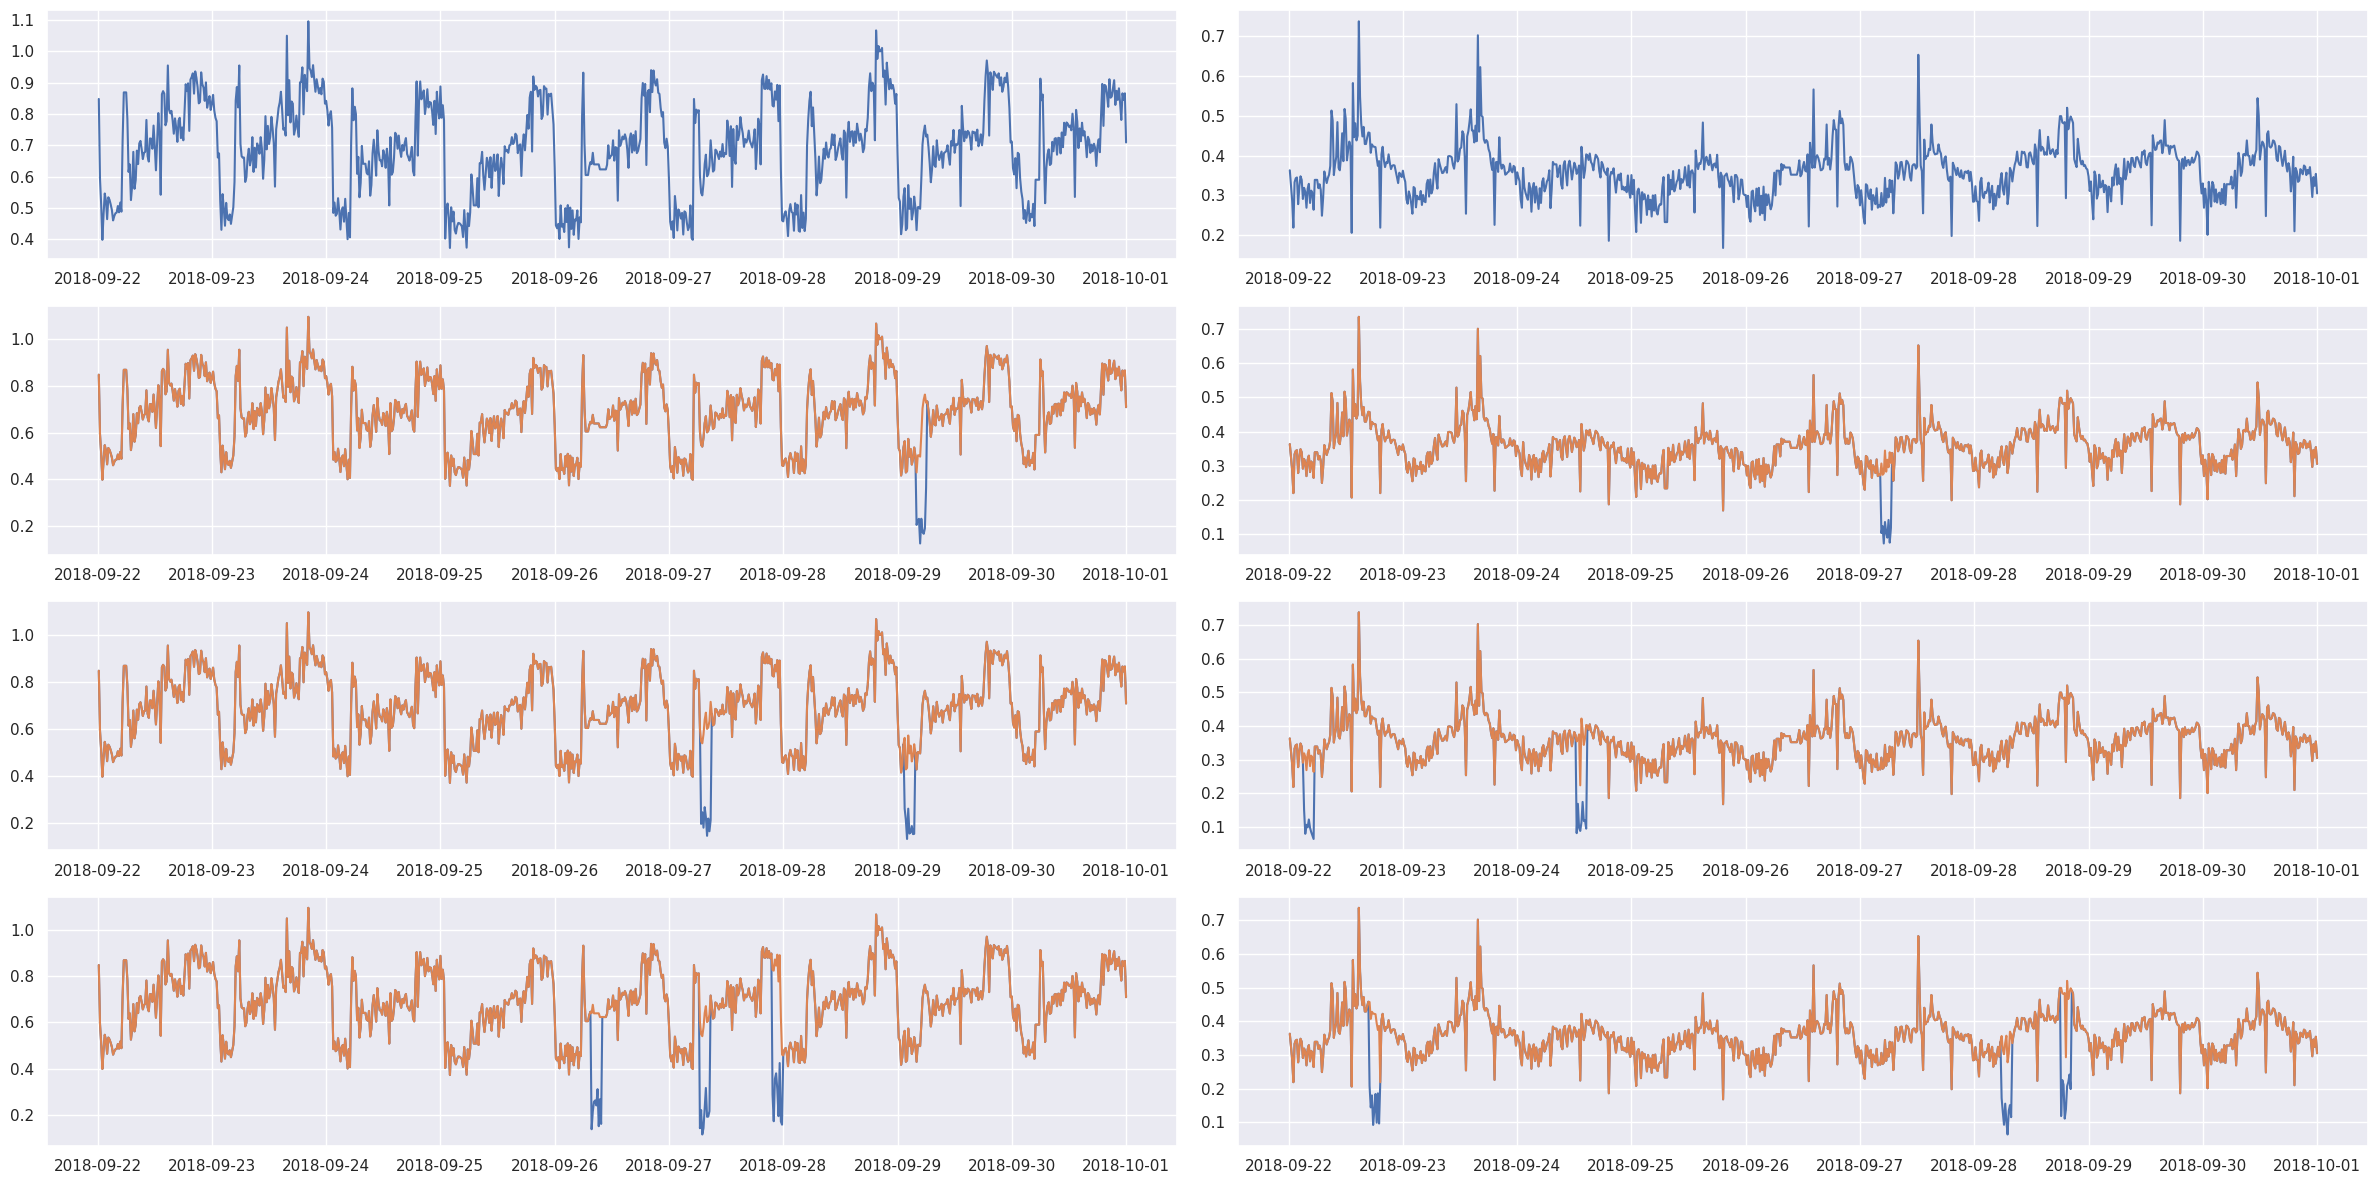

In [ ]:
plt.rcParams['figure.figsize'] = [24, 12]

plt.subplot(4, 2, 1)
plt.plot(test_base.유효전력)
plt.subplot(4, 2, 2)
plt.plot(test_base.지상무효전력)

plt.subplot(4, 2, 3)
plt.plot(test_base_1per.유효전력)
plt.plot(test_base.유효전력)
plt.subplot(4, 2, 4)
plt.plot(test_base_1per.지상무효전력)
plt.plot(test_base.지상무효전력)

plt.subplot(4,2, 5)
plt.plot(test_base_2per.유효전력)
plt.plot(test_base.유효전력)
plt.subplot(4,2, 6)
plt.plot(test_base_2per.지상무효전력)
plt.plot(test_base.지상무효전력)

plt.subplot(4, 2, 7)
plt.plot(test_base_3per.유효전력)
plt.plot(test_base.유효전력)
plt.subplot(4, 2, 8)
plt.plot(test_base_3per.지상무효전력)
plt.plot(test_base.지상무효전력)

plt.tight_layout()
plt.show()

# Experiment
* 테스트 실험은 일단 **2%**로 진행

## Multivariate KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
X = train_base.values

In [ ]:
nbrs = NearestNeighbors(n_neighbors =3)
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

In [ ]:
Y = test_base_2per.values
distances, indexes = nbrs.kneighbors(Y)
anomaly_scores = np.mean(distances, axis=1)

In [ ]:
threshold = np.percentile(anomaly_scores, 97)
outlier_index = np.where(distances.mean(axis = 1) > threshold)
outlier_index

(array([ 13,  18,  19,  20, 241, 243, 244, 249, 506, 507, 508, 509, 510,
        511, 512, 513, 514, 677, 678, 679, 680, 681, 682, 683, 684, 685]),)

In [ ]:
outlier_values = data_base.iloc[outlier_index]
outlier_values

,유효전력,지상무효전력
Date,,
2018-09-01 03:30:00,0.633,0.438
2018-09-01 04:45:00,0.597,0.415
2018-09-01 05:00:00,0.672,0.404
2018-09-01 05:15:00,0.863,0.465
2018-09-03 12:30:00,1.003,0.593
2018-09-03 13:00:00,0.974,0.535
2018-09-03 13:15:00,0.505,0.269
2018-09-03 14:30:00,0.971,0.630
2018-09-06 06:45:00,0.814,0.420


In [ ]:
tt = list(outlier_index[0])

In [ ]:
check = labeling[96*21:]

In [ ]:
TP = 0
FP = 0
TN = 0
FN = 0
for  i in range(len(check)):
    if i in tt:
        if(check['유효전력_2per'].iloc[i] == 1):
            TP += 1
        elif(check['지상무효전력_2per'].iloc[i] == 1):
            TP += 1
        else:
            FP += 1

    else:
        if(check['유효전력_2per'].iloc[i] == 1):
            FN += 1
        elif(check['지상무효전력_2per'].iloc[i] == 1):
            FN += 1
        else:
            TN += 1

print("TP:", TP, "FP:", FP,"TN:", TN,"FN:", FN)

TP: 26 FP: 0 TN: 828 FN: 10


In [ ]:
ACC = (TP + TN) / (TP + FP + TN + FN) * 100
ACC

98.8425925925926

In [ ]:
SEN = TP / (TP + FN) * 100
SEN

72.22222222222221

In [ ]:
PRE = TP / (TP + FP) * 100
PRE

100.0

In [ ]:
RE = TP / (TP + FN) * 100
RE

72.22222222222221

In [ ]:
knn_F1 = 2 * (PRE*RE) / (PRE+RE)
knn_F1

83.87096774193547

##KNN 결과


In [ ]:
print("ACC: ",ACC, "PRE: ", PRE, "RE: ",RE, "knn_F1:", knn_F1)

ACC:  98.8425925925926 PRE:  100.0 RE:  72.22222222222221 knn_F1: 83.87096774193547


## Multivariate SVM

In [ ]:
from sklearn.svm import OneClassSVM
from numpy import where
from sklearn.metrics import f1_score

In [ ]:
input_data = (train_base - train_base.mean()) / train_base.std()

In [ ]:
model = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
model.fit(input_data)

OneClassSVM(gamma=0.1, nu=0.01)

In [ ]:
test_data = (test_base_2per - test_base_2per.mean()) / test_base_2per.std()

In [ ]:
y_pred = model.predict(test_data)

In [ ]:
outlier_index = where(y_pred == -1)

outlier_values = data_base.iloc[outlier_index]
outlier_values

,유효전력,지상무효전력
Date,,
2018-09-01 03:30:00,0.633,0.438
2018-09-01 03:45:00,0.650,0.440
2018-09-01 04:00:00,0.613,0.386
2018-09-01 04:30:00,0.551,0.363
2018-09-01 04:45:00,0.597,0.415
2018-09-01 05:00:00,0.672,0.404
2018-09-01 05:15:00,0.863,0.465
2018-09-01 14:45:00,0.732,0.415
2018-09-02 05:45:00,0.797,0.346


In [ ]:
tt = list(outlier_index[0])

In [ ]:
check = labeling[96*21:]

In [ ]:
TP = 0
FP = 0
TN = 0
FN = 0
for  i in range(len(check)):
    if i in tt:
        if(check['유효전력_2per'].iloc[i] == 1):
            TP += 1
        elif(check['지상무효전력_2per'].iloc[i] == 1):
            TP += 1
        else:
            FP += 1

    else:
        if(check['유효전력_2per'].iloc[i] == 1):
            FN += 1
        elif(check['지상무효전력_2per'].iloc[i] == 1):
            FN += 1
        else:
            TN += 1

print("TP:", TP, "FP:", FP,"TN:", TN,"FN:", FN)

TP: 32 FP: 5 TN: 823 FN: 4


In [ ]:
ACC = (TP + TN) / (TP + FP + TN + FN) * 100
ACC

98.95833333333334

In [ ]:
SEN = TP / (TP + FN) * 100
SEN

88.88888888888889

In [ ]:
PRE = TP / (TP + FP) * 100
PRE

86.48648648648648

In [ ]:
RE = TP / (TP + FN) * 100
RE

88.88888888888889

In [ ]:
svm_F1 = 2 * (PRE*RE) / (PRE+RE)
svm_F1

87.67123287671232

##SVM 결과

In [ ]:
print("ACC: ",ACC, "PRE: ", PRE, "RE: ",RE, "svm_F1:", svm_F1)

ACC:  98.95833333333334 PRE:  86.48648648648648 RE:  88.88888888888889 svm_F1: 87.67123287671232


## 중간 결과 (KNN vs SVM)
- KNN / SVM 논문 중에서 KNN과 SVM의 성능이 비슷하다라는 논문이 있었음
- 아래 결과는 10회 측정한 결과임

|모델|1회|2회|3회|4회|5회|6회|7회|8회|9회|10회|평균|
|---|---|---|---|---|---|---|---|---|---|---|---|
|KNN|85|90|90|90|90|87|90|90|87|81|88|
|SVM|89|88|89|83|90|92|87|92|89|89|88.8|


## LSTM Autoencoder

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set(color_codes=True)

import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [ ]:
#normalize the data
scaler = StandardScaler()
df_train = train_base.copy()
df_test = test_base_2per.copy()
df_base = test_base.copy()
X_train = scaler.fit_transform(df_train)
X_test = scaler.transform(df_test)
X_base = scaler.transform(df_base)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)
X_base = X_base.reshape(X_base.shape[0], 1, X_base.shape[1])
print("Test base shape:", X_base.shape)

Training data shape: (2016, 1, 2)
Test data shape: (864, 1, 2)
Test base shape: (864, 1, 2)


In [ ]:
#define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(32, activation='elu', return_sequences=True, kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(16, activation='elu', return_sequences=True)(L1)
    L3 = LSTM(8, activation='elu', return_sequences=False)(L2)
    L4 = RepeatVector(X.shape[1])(L3)
    L5 = LSTM(8, activation='elu', return_sequences=True)(L4)
    L6 = LSTM(16, activation='elu', return_sequences=True)(L5)
    L7 = LSTM(32, activation='elu', return_sequences=True)(L6)
    output = TimeDistributed(Dense(X.shape[2]))(L6)
    model = Model(inputs=inputs, outputs=output)
    return model

In [ ]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 2)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 32)             4480      
                                                                 
 lstm_1 (LSTM)               (None, 1, 16)             3136      
                                                                 
 lstm_2 (LSTM)               (None, 8)                 800       
                                                                 
 repeat_vector (RepeatVector  (None, 1, 8)             0         
 )                                                               
                                                                 
 lstm_3 (LSTM)               (None, 1, 8)              544       
                                                           

In [ ]:
nb_epochs = 100
batch_size =16
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size, validation_split=0.05).history

Epoch 1/100
120/120 [==============================] - 11s 26ms/step - loss: 0.7673 - val_loss: 0.4321
Epoch 2/100
120/120 [==============================] - 3s 28ms/step - loss: 0.3684 - val_loss: 0.3521
Epoch 3/100
120/120 [==============================] - 3s 27ms/step - loss: 0.3162 - val_loss: 0.3566
Epoch 4/100
120/120 [==============================] - 2s 19ms/step - loss: 0.3131 - val_loss: 0.3577
Epoch 5/100
120/120 [==============================] - 2s 20ms/step - loss: 0.3108 - val_loss: 0.3518
Epoch 6/100
120/120 [==============================] - 2s 19ms/step - loss: 0.3092 - val_loss: 0.3550
Epoch 7/100
120/120 [==============================] - 3s 27ms/step - loss: 0.3080 - val_loss: 0.3473
Epoch 8/100
120/120 [==============================] - 3s 29ms/step - loss: 0.3053 - val_loss: 0.3423
Epoch 9/100
120/120 [==============================] - 2s 19ms/step - loss: 0.3036 - val_loss: 0.3471
Epoch 10/100
120/120 [==============================] - 2s 19ms/step - loss: 0.30

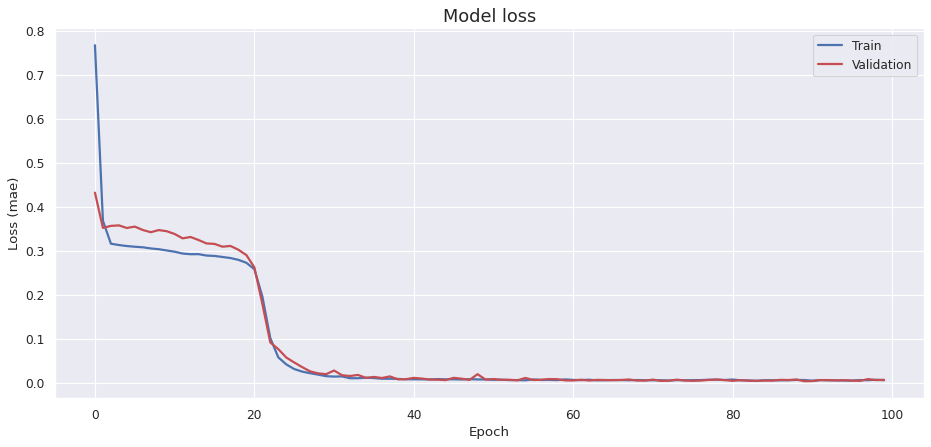

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14,6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

63/63 [==============================] - 2s 3ms/step


<ipython-input-142-fffac3094c30>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');


(0.0, 0.1)

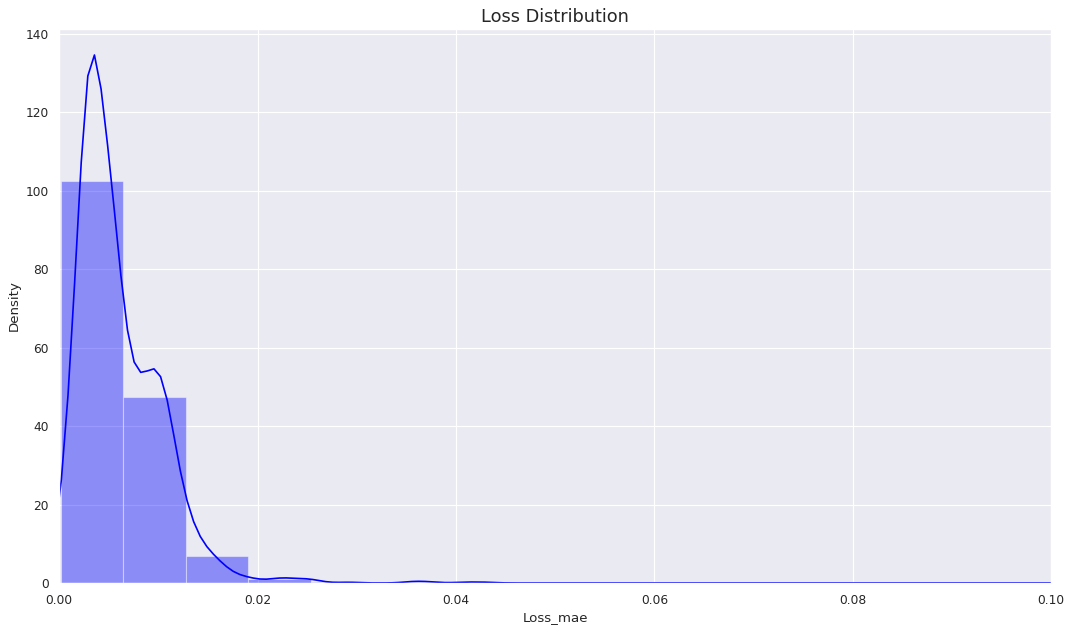

In [ ]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train_base.columns)
X_pred.index = train_base.index

scored = pd.DataFrame(index=train_base.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis=1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,0.1])

In [ ]:
# print('anomaly threshold = {}'.format(scored['Loss_mae'].mean() + scored['Loss_mae'].std()*2))
# threshold = scored['Loss_mae'].mean() + scored['Loss_mae'].std()*2
print('anomaly threshold = {}'.format(np.percentile(scored['Loss_mae'],99.6)))
threshold = np.percentile(scored['Loss_mae'],99.6)
scored['Threshold'] = threshold

# calculate the loss on the test set
X_pred = model.predict(X_test)
print(X_pred)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test_base_2per.columns)
X_pred.index = test_base_2per.index

scored = pd.DataFrame(index=test_base_2per.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
print(X_test)
#Xbase = X_base.reshape(X_base.shape[0], X_base.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = threshold
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']

print(scored.head())

anomaly threshold = 0.02509094864052466
27/27 [==============================] - 0s 3ms/step
[[[ 0.65633976 -0.601112  ]]

 [[-0.93739796 -1.1319104 ]]

 [[-1.461265   -1.6705751 ]]

 ...

 [[ 0.64431274 -1.1541792 ]]

 [[ 0.76850045 -0.7344297 ]]

 [[-0.217572   -1.3852022 ]]]
[[[ 0.6565476  -0.60748899]]

 [[-0.92535541 -1.13272477]]

 [[-1.44645288 -1.67178255]]

 ...

 [[ 0.63793698 -1.14654677]]

 [[ 0.76821134 -0.73188694]]

 [[-0.20574463 -1.40916466]]]
                     Loss_mae  Threshold  Anomaly
Date                                             
2018-09-22 00:15:00  0.003292   0.025091    False
2018-09-22 00:30:00  0.006428   0.025091    False
2018-09-22 00:45:00  0.008010   0.025091    False
2018-09-22 01:00:00  0.021388   0.025091    False
2018-09-22 01:15:00  0.010041   0.025091    False


<Axes: xlabel='Date'>

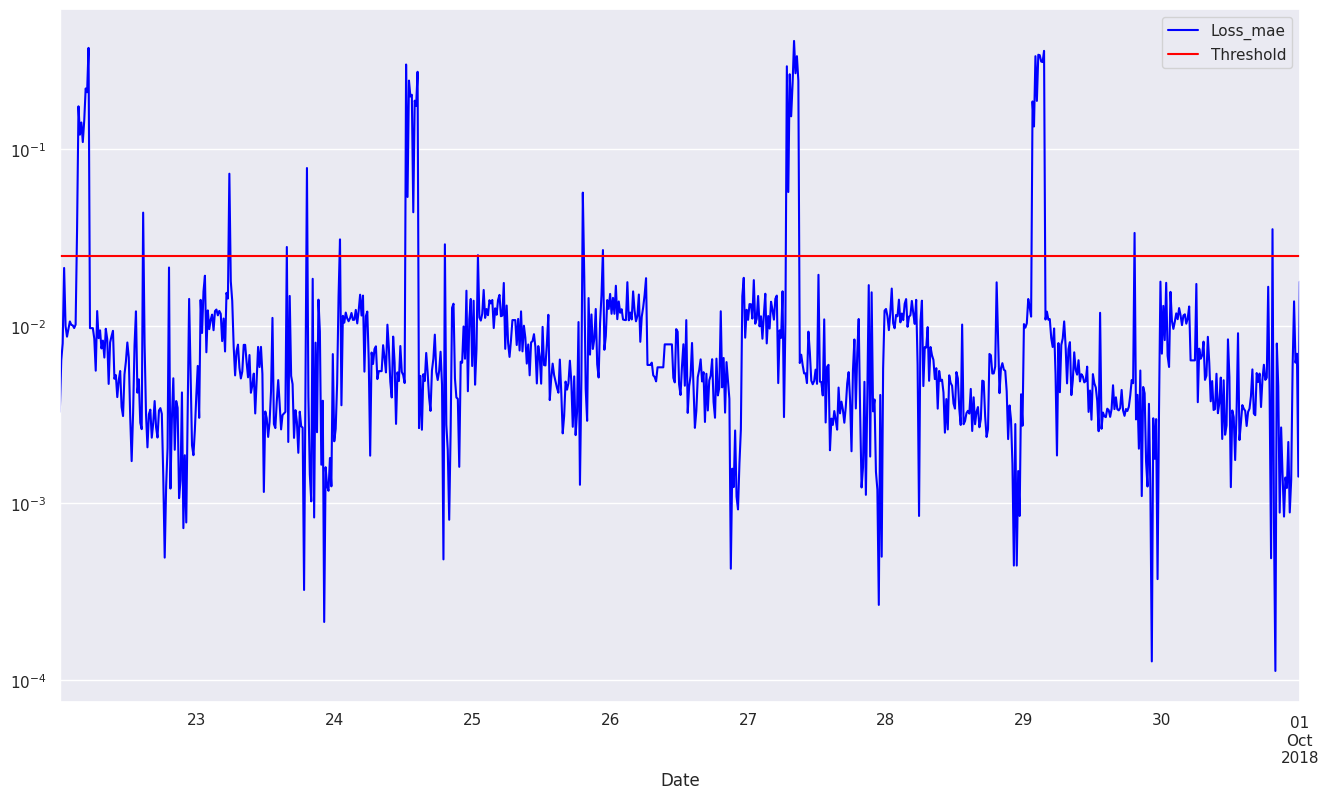

In [ ]:
# test set에 대한 결과
scored.plot(logy=True,  figsize=(16,9), color=['blue','red'])

In [ ]:
answer = test_base.copy()
answer = scaler.transform(answer)

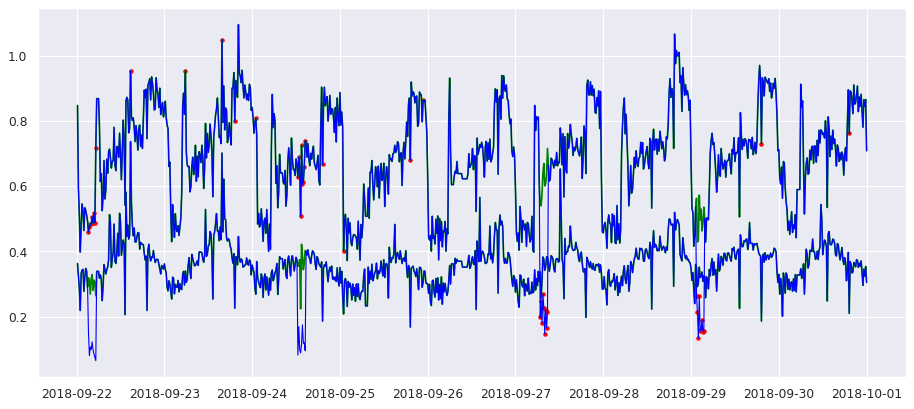

In [ ]:
# whole test data
test_ = pd.DataFrame(test_base_2per, columns=['유효전력','지상무효전력'])

# make plot
fig, ax = plt.subplots(figsize=(14,6), dpi=80)
ax.plot(test_base['유효전력'], color='green')
ax.plot(test_base['지상무효전력'], color='green')
ax.plot(test_['유효전력'], label='유효전력', color='blue', animated=True, linewidth=1)
ax.plot(test_['지상무효전력'], label='지상무효전력', color='blue', animated=True, linewidth=1)
ax.scatter(test_[scored['Anomaly']==1]['유효전력'].index, test_[scored['Anomaly']==1]['유효전력'], label='anomal', marker='.', color='red')
# plt.axvspan(min(labeling[labeling['유효전력_2per']==1].index), max(labeling[labeling['유효전력_2per']==1].index), facecolor='gray', alpha=0.3)
# plt.axvspan(min(labeling[labeling['지상무효전력_2per']==1].index), max(labeling[labeling['지상무효전력_2per']==1].index), facecolor='gray', alpha=0.3)

plt.show()

In [ ]:
outlier_index = where(scored['Anomaly'] == 1)

outlier_values = test_base_2per.iloc[outlier_index]
outlier_values
print(outlier_index)

(array([ 12,  13,  14,  15,  16,  17,  18,  19,  20,  58, 118, 158, 172,
       195, 241, 242, 243, 244, 245, 246, 247, 248, 249, 268, 291, 364,
       378, 506, 507, 508, 509, 510, 511, 512, 513, 514, 677, 678, 679,
       680, 681, 682, 683, 684, 685, 748, 844]),)


In [ ]:
tt = list(outlier_index[0])

In [ ]:
check = labeling[96*21:]

In [ ]:
TP = 0
FP = 0
TN = 0
FN = 0
for  i in range(len(check)):
    if i in tt:
        if(check['유효전력_2per'].iloc[i] == 1):
            TP += 1
        elif(check['지상무효전력_2per'].iloc[i] == 1):
            TP += 1
        else:
            FP += 1

    else:
        if(check['유효전력_2per'].iloc[i] == 1):
            FN += 1
        elif(check['지상무효전력_2per'].iloc[i] == 1):
            FN += 1
        else:
            TN += 1

print("TP:", TP, "FP:", FP,"TN:", TN,"FN:", FN)

TP: 36 FP: 11 TN: 817 FN: 0


In [ ]:
ACC = (TP + TN) / (TP + FP + TN + FN) * 100
ACC

98.72685185185185

In [ ]:
SEN = TP / (TP + FN) * 100
SEN

100.0

In [ ]:
PRE = TP / (TP + FP) * 100
PRE

76.59574468085107

In [ ]:
RE = TP / (TP + FN) * 100
RE

100.0

In [ ]:
lstm_F1 = 2 * (PRE*RE) / (PRE+RE)
lstm_F1

86.74698795180724

##LSTM 결과

In [ ]:
print("ACC: ",ACC, "PRE: ", PRE, "RE: ",RE, "lstm_F1:", lstm_F1)

ACC:  98.72685185185185 PRE:  76.59574468085107 RE:  100.0 lstm_F1: 86.74698795180724


## TCN Autoencoder (baseline)

In [ ]:
!pip install wget
!pip install keras-tcn
import wget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector, TimeDistributed
from tqdm.notebook import tqdm

from tcn import TCN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train = train_base.values
test = test_base_2per.values
answer = test_base.values

In [ ]:
lookback_window = 16

In [ ]:
train_x = []
train_y = []
for i in tqdm(range(lookback_window, len(train))):
    train_x.append(train[i-lookback_window:i])
    train_y.append(train[i-lookback_window:i])

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
test_x = []
test_y = []
for i in tqdm(range(lookback_window, len(test))):
    test_x.append(test[i-lookback_window:i])
    test_y.append(test[i-lookback_window:i])

  0%|          | 0/848 [00:00<?, ?it/s]

In [ ]:
answer_x = []
answer_y = []
for i in tqdm(range(lookback_window, len(answer))):
    answer_x.append(answer[i-lookback_window:i])
    answer_y.append(answer[i-lookback_window:i])

  0%|          | 0/848 [00:00<?, ?it/s]

In [ ]:
x = np.array(train_x).astype(float)
y = np.array(train_y).astype(float)
print(x.shape)
print(y.shape)

(2000, 16, 2)
(2000, 16, 2)


In [ ]:
import numpy
from tcn import TCN
import time
import tensorflow
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import UpSampling1D
from tensorflow.keras.layers import AveragePooling1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adamax
import pandas

In [ ]:
ts_dimension = 2
dilations = (1, 2, 4, 8, 16, 32 , 64)
nb_filters = 16
kernel_size = 16
nb_stacks = 4
padding = 'same'
dropout_rate = 0.3
filters_conv1d = 8
activation_conv1d = 'elu'
latent_sample_rate = 16
pooler = AveragePooling1D
learning_rate = 0.001
conv_kernel_init = 'he_normal'
loss = 'mse'
use_early_stopping = True
error_window_length = 96
verbose = 1

tensorflow.keras.backend.clear_session()
sampling_factor = latent_sample_rate
i = Input(batch_shape=(None, None, ts_dimension))

        # Put signal through TCN. Output-shape: (batch,sequence length, nb_filters)
tcn_enc = TCN(nb_filters=nb_filters, kernel_size=kernel_size, nb_stacks=nb_stacks, dilations=dilations,
padding=padding, use_skip_connections=True, dropout_rate=dropout_rate, return_sequences=True,
kernel_initializer=conv_kernel_init, name='tcn-enc')(i)

        # Now, adjust the number of channels...
enc_flat = Conv1D(filters=filters_conv1d, kernel_size=1, activation=activation_conv1d, padding=padding)(tcn_enc)

enc_flat2 = Conv1D(filters=filters_conv1d, kernel_size=1, activation=activation_conv1d, padding=padding)(enc_flat)
enc_flat3 = Conv1D(filters=filters_conv1d, kernel_size=1, activation=activation_conv1d, padding=padding)(enc_flat2)

        ## Do some average (max) pooling to get a compressed representation of the time series (e.g. a sequence of length 8)
enc_pooled = pooler(pool_size=sampling_factor, strides=None, padding='valid', data_format='channels_last')(enc_flat3)

        # If you want, maybe put the pooled values through a non-linear Activation
enc_out = Activation("elu")(enc_pooled)

        # Now we should have a short sequence, which we will upsample again and then try to reconstruct the original series
dec_upsample = UpSampling1D(size=sampling_factor)(enc_out)

dec_reconstructed = TCN(nb_filters=nb_filters, kernel_size=kernel_size, nb_stacks=nb_stacks, dilations=dilations,
padding=padding, use_skip_connections=True, dropout_rate=dropout_rate, return_sequences=True,
kernel_initializer=conv_kernel_init, name='tcn-dec')(dec_upsample)

enc_flat4 = Conv1D(filters=filters_conv1d, kernel_size=1, activation=activation_conv1d, padding=padding)(dec_reconstructed)
enc_flat5 = Conv1D(filters=filters_conv1d, kernel_size=1, activation=activation_conv1d, padding=padding)(enc_flat4)
enc_flat6 = Conv1D(filters=filters_conv1d, kernel_size=1, activation=activation_conv1d, padding=padding)(enc_flat5)
        # Put the filter-outputs through a dense layer finally, to get the reconstructed signal
o = Dense(ts_dimension, activation='elu')(enc_flat6)

model = Model(inputs=[i], outputs=[o])

adam = optimizers.legacy.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=True)
model.compile(loss=loss, optimizer=adam, metrics=[loss])

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 2)]         0         
                                                                 
 tcn-enc (TCN)               (None, None, 16)          226736    
                                                                 
 conv1d (Conv1D)             (None, None, 8)           136       
                                                                 
 conv1d_1 (Conv1D)           (None, None, 8)           72        
                                                                 
 conv1d_2 (Conv1D)           (None, None, 8)           72        
                                                                 
 average_pooling1d (AverageP  (None, None, 8)          0         
 ooling1D)                                                       
                                                             

In [ ]:
history = model.fit(x[:96*19], y[:96*19], epochs=100, verbose=1)

Epoch 1/100
57/57 [==============================] - 38s 117ms/step - loss: 9.4570 - mse: 9.4570
Epoch 2/100
57/57 [==============================] - 2s 41ms/step - loss: 0.5390 - mse: 0.5390
Epoch 3/100
57/57 [==============================] - 2s 42ms/step - loss: 0.0533 - mse: 0.0533
Epoch 4/100
57/57 [==============================] - 2s 41ms/step - loss: 0.0308 - mse: 0.0308
Epoch 5/100
57/57 [==============================] - 3s 48ms/step - loss: 0.0242 - mse: 0.0242
Epoch 6/100
57/57 [==============================] - 3s 58ms/step - loss: 0.0210 - mse: 0.0210
Epoch 7/100
57/57 [==============================] - 2s 42ms/step - loss: 0.0192 - mse: 0.0192
Epoch 8/100
57/57 [==============================] - 2s 42ms/step - loss: 0.0191 - mse: 0.0191
Epoch 9/100
57/57 [==============================] - 2s 41ms/step - loss: 0.0184 - mse: 0.0184
Epoch 10/100
57/57 [==============================] - 2s 44ms/step - loss: 0.0179 - mse: 0.0179
Epoch 11/100
57/57 [===========================

In [ ]:
test_x = np.array(test_x).astype(float)
test_y = np.array(test_y).astype(float)
print(test_x.shape)
print(test_y.shape)

(848, 16, 2)
(848, 16, 2)


In [ ]:
answer_y = np.array(answer_y).astype(float)

In [ ]:
predict = model.predict(test_x)

27/27 [==============================] - 4s 21ms/step


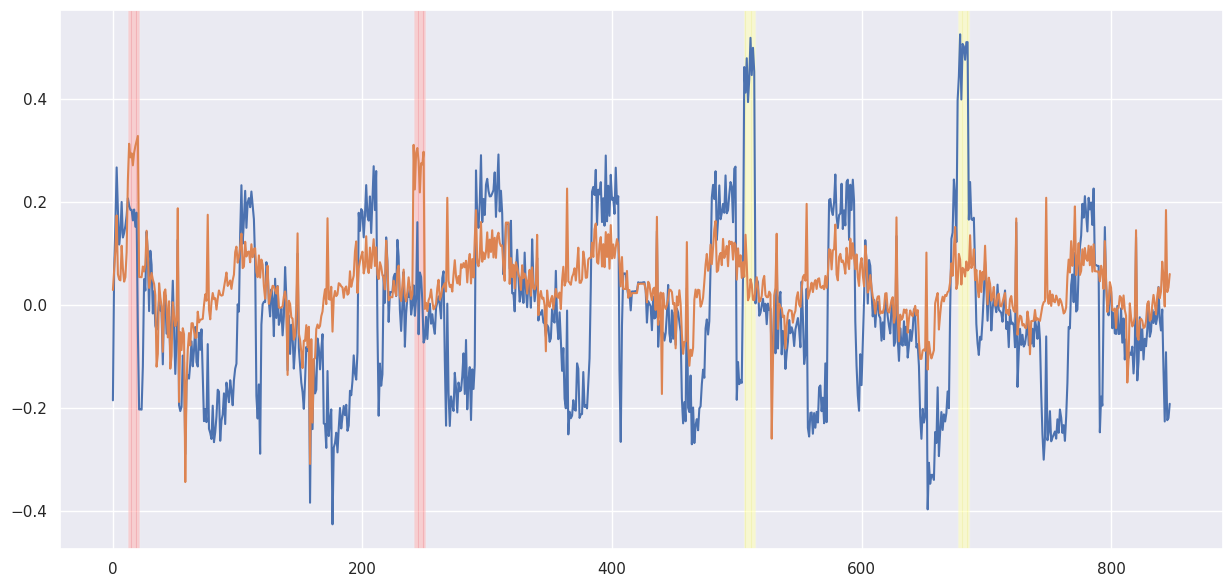

In [ ]:
plt.figure(figsize=(15,7))
# answer=[]
# for i in range(len(answer_y)):
#     answer.append(answer_y[i][0][0])
# plt.plot(answer, color='red')

# tt=[]
# for i in range(len(test_base)):
#     tt.append(test_base.유효전력[i])
# plt.plot(tt, color='green')

# input=[]
# for i in range(len(test_y)):
#     input.append(y[i][0][0])
# plt.plot(input, color='green')

for i in range(len(test_y)):
    if(labeling.유효전력_2per[96*21+i] == 1):
        plt.axvspan(i, i+1, facecolor='yellow', alpha=0.3)

for i in range(len(test_y)):
    if(labeling.지상무효전력_2per[96*21+i]==1):
        plt.axvspan(i, i+1, facecolor='red', alpha=0.3)

res1=[]
for i in range(len(predict)):
    res1.append(predict[i][0][0]-test_y[i][0][0])
plt.plot(res1)

res2=[]
for i in range(len(predict)):
    res2.append(predict[i][0][1]-test_y[i][0][1])
plt.plot(res2)

plt.show()

In [ ]:
training_again = model.predict(x[96*19:])
t1=[]
for i in range(len(training_again)):
    t1.append(training_again[i][0][0] - y[96*19+i][0][0])
# tcn_threshold1 = np.percentile(t1,100)

t2=[]
for j in range(len(training_again)):
    t2.append(training_again[j][0][1] - y[96*19+j][0][1])
# tcn_threshold2 = np.percentile(t2,100)

6/6 [==============================] - 0s 16ms/step


In [ ]:
# print(tcn_threshold1)
# print(tcn_threshold2)

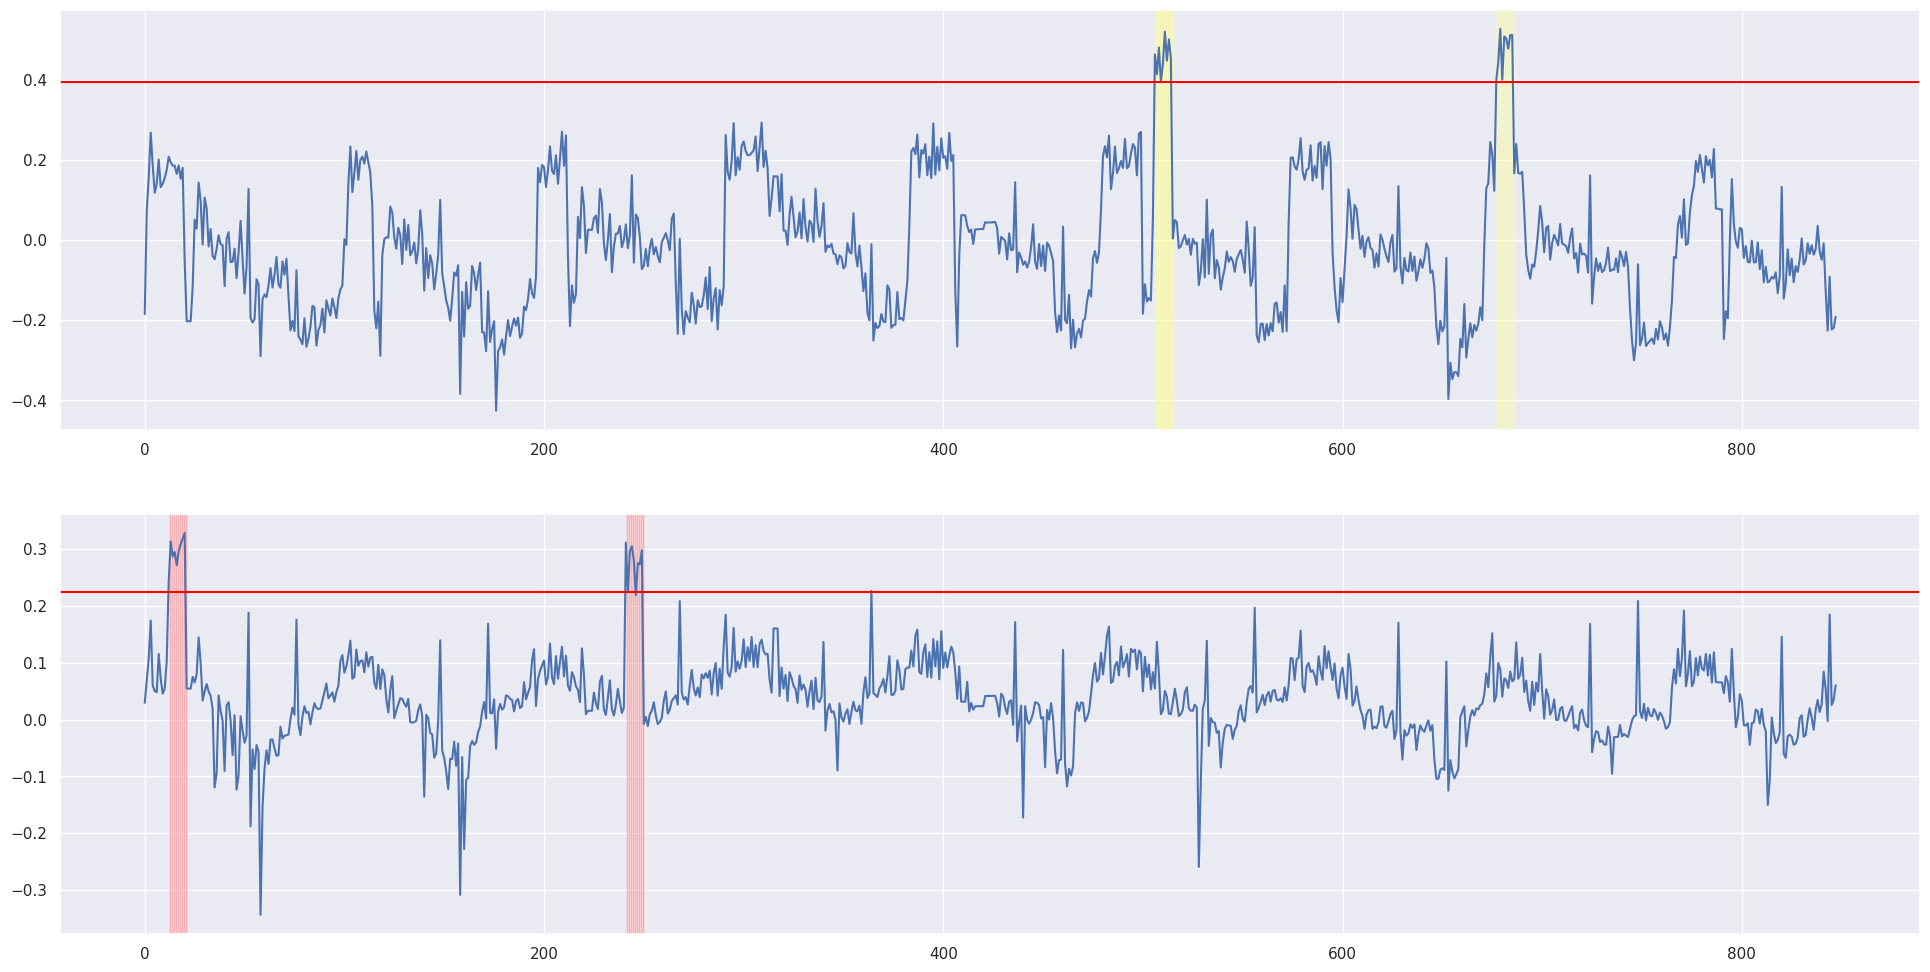

In [ ]:
plt.rcParams['figure.figsize'] = [24, 12]

plt.subplot(2, 1, 1)
for i in range(len(test_y)):
    if(labeling.유효전력_2per[96*21+i] == 1):
        plt.axvspan(i, i+1, facecolor='yellow', alpha=0.3)
plt.plot(res1)
tcn_threshold1 = np.percentile(res1, 98)
plt.axhline(tcn_threshold1, 0, 1, color='red')

plt.subplot(2, 1, 2)
i=0
for i in range(len(test_y)):
    if(labeling.지상무효전력_2per[96*21+i]==1):
        plt.axvspan(i, i+1, facecolor='red', alpha=0.3)
plt.plot(res2)
tcn_threshold2 = np.percentile(res2, 98)
plt.axhline(tcn_threshold2, 0, 1, color='red')

plt.show()

In [ ]:
tt=[]
for i in range(len(res1)):
    if res1[i] >= tcn_threshold1 or res2[i] >= tcn_threshold2 :
        tt.append(i)

In [ ]:
check = labeling[96*21:]

In [ ]:
check[check['유효전력_2per']==1]

,유효전력_1per,유효전력_2per,유효전력_3per,지상무효전력_1per,지상무효전력_2per,지상무효전력_3per
2018-09-27 06:45:00,0,1,1,0,0,0
2018-09-27 07:00:00,0,1,1,0,0,0
2018-09-27 07:15:00,0,1,1,0,0,0
2018-09-27 07:30:00,0,1,1,0,0,0
2018-09-27 07:45:00,0,1,1,0,0,0
2018-09-27 08:00:00,0,1,1,0,0,0
2018-09-27 08:15:00,0,1,1,0,0,0
2018-09-27 08:30:00,0,1,1,0,0,0
2018-09-27 08:45:00,0,1,0,0,0,0
2018-09-29 01:30:00,0,1,0,0,0,0


In [ ]:
TP = 0
FP = 0
TN = 0
FN = 0
for  i in range(len(check)):
    if i in tt:
        if(check['유효전력_2per'].iloc[i] == 1):
            TP += 1
        elif(check['지상무효전력_2per'].iloc[i] == 1):
            TP += 1
        else:
            FP += 1

    else:
        if(check['유효전력_2per'].iloc[i] == 1):
            FN += 1
        elif(check['지상무효전력_2per'].iloc[i] == 1):
            FN += 1
        else:
            TN += 1

print("TP:", TP, "FP:", FP,"TN:", TN,"FN:", FN)

TP: 33 FP: 1 TN: 827 FN: 3


In [ ]:
ACC = (TP + TN) / (TP + FP + TN + FN) * 100
ACC

99.53703703703704

In [ ]:
SEN = TP / (TP + FN) * 100
SEN

91.66666666666666

In [ ]:
PRE = TP / (TP + FP) * 100
PRE

97.05882352941177

In [ ]:
RE = TP / (TP + FN) * 100
RE

91.66666666666666

In [ ]:
tcn_F1 = 2 * (PRE*RE) / (PRE+RE)
tcn_F1

94.28571428571428

##TCN 결과

In [ ]:
print("ACC: ",ACC, "PRE: ", PRE, "RE: ",RE, "tcn_F1:", tcn_F1)

ACC:  99.53703703703704 PRE:  97.05882352941177 RE:  91.66666666666666 tcn_F1: 94.28571428571428


# Result

In [ ]:
print("KNN: ", knn_F1)
print("OC-SVM: ", svm_F1)
print("LSTM-AE: ", lstm_F1)
print("TCN-AE: ", tcn_F1)

KNN:  83.87096774193547
OC-SVM:  87.67123287671232
LSTM-AE:  86.74698795180724
TCN-AE:  94.28571428571428
